# Principal Component Analysis: PCA

In [138]:
import seaborn as sns
from sklearn.cross_validation import train_test_split

iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

In [139]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)    # 2. Instantiate the model with hyperparameters
model.fit(X_iris)              # 3. Fit to data. Notice y is not specified!

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [140]:
print("check number of components", model.n_components_)

('check number of components', 2)


## Transform the data

In [141]:
X_2D = model.transform(X_iris) # 4. Transform the data to two dimenstions

In [142]:
print("show first row of data", X_2D[0,:])

('show first row of data', array([-2.68412563,  0.31939725]))


In [143]:
# transform each row of data
print model.transform(X_iris.iloc[0,:].as_matrix().reshape(1, -1))

[[-2.68412563  0.31939725]]


## Insert X_2D into the original Iris DataFrame

In [144]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]

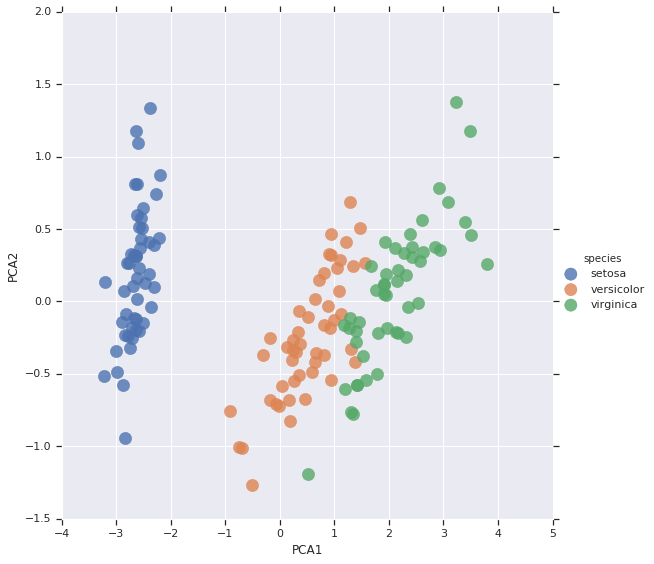

In [57]:
import seaborn as sns

sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False, size=8, scatter_kws={"s": 150});

## Change number of components

In [58]:
from sklearn.decomposition import PCA

model = PCA(n_components=5)    # 2. Instantiate the model with hyperparameters
model.fit(X_iris)              # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris) # 4. Transform the data to two dimenstions

ValueError: n_components=5 must be between 0 and n_features=4 with svd_solver='full'

ในกรณีนี้ไม่สามารถกำหนด n_components ให้มากกว่า 4 ได้ เนื่องจาก Iris dataset มีจำนวน feature จำนวนเพียง 4 ค่า

In [146]:
from sklearn.decomposition import PCA

model = PCA(n_components=3)    # 2. Instantiate the model with hyperparameters
model.fit(X_iris)              # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris) # 4. Transform the data to two dimenstions

iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
iris['PCA3'] = X_2D[:,2]

In [147]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,PCA3
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,-0.027915
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,-0.210464
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0.017900
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0.031559
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0.090079


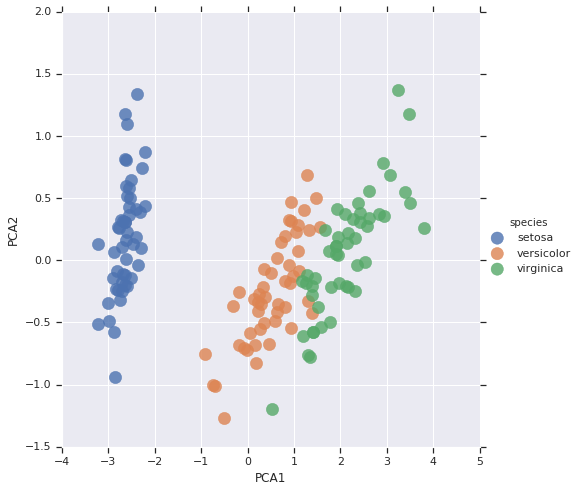

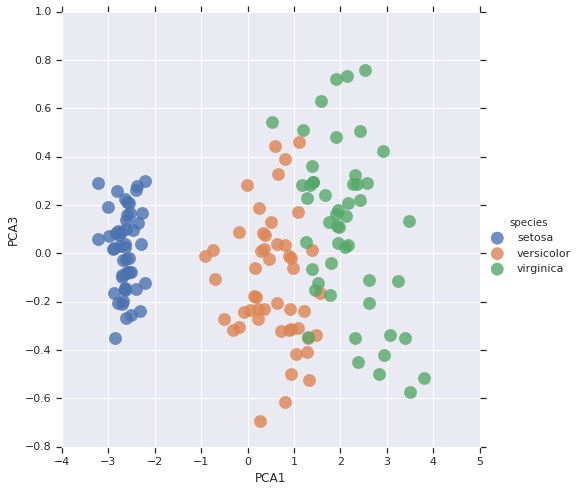

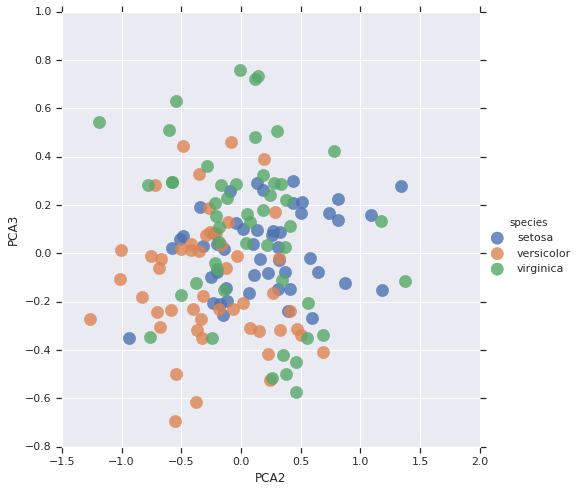

In [148]:
import seaborn as sns
sns.set()

sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False, size=7, scatter_kws={"s": 150});
sns.lmplot("PCA1", "PCA3", hue='species', data=iris, fit_reg=False, size=7, scatter_kws={"s": 150});
sns.lmplot("PCA2", "PCA3", hue='species', data=iris, fit_reg=False, size=7, scatter_kws={"s": 150});

# Training new features using Naive Bayes

In [151]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,PCA3
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,-0.027915
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,-0.210464
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0.017900
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0.031559
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0.090079


In [170]:
from sklearn.cross_validation import train_test_split

X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [167]:
Xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width,PCA1,PCA2,PCA3
54,6.5,2.8,4.6,1.5,1.088103,0.074591,-0.307758
108,6.7,2.5,5.8,1.8,2.321229,-0.243832,-0.348304
112,6.8,3.0,5.5,2.1,2.165592,0.216276,0.033327
17,5.1,3.5,1.4,0.3,-2.648297,0.311849,0.026668
119,6.0,2.2,5.0,1.5,1.300792,-0.761150,-0.344995


In [168]:
ytrain.head()

54     versicolor
108     virginica
112     virginica
17         setosa
119     virginica
Name: species, dtype: object

In [171]:
Xtrain = Xtrain.ix[:,['PCA1','PCA2','PCA3']]

Xtrain.head()

,PCA1,PCA2,PCA3
54,1.088103,0.074591,-0.307758
108,2.321229,-0.243832,-0.348304
112,2.165592,0.216276,0.033327
17,-2.648297,0.311849,0.026668
119,1.300792,-0.761150,-0.344995


In [172]:
Xtest = Xtest.ix[:,['PCA1','PCA2','PCA3']]

Xtest.head()

,PCA1,PCA2,PCA3
14,-2.644750,1.178765,-0.151628
98,-0.906470,-0.756093,-0.012600
75,0.900174,0.328504,-0.316209
16,-2.623528,0.810680,0.138183
131,3.230674,1.374165,-0.114548


In [173]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class

model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data

GaussianNB(priors=None)

In [174]:
y_model = model.predict(Xtest)  

In [175]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.9473684210526315

In [176]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

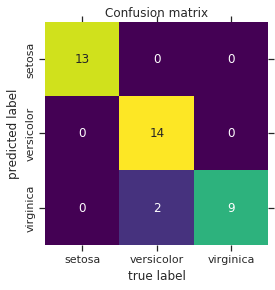

In [177]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='viridis',
            xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])

plt.title('Confusion matrix')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()